In [18]:
import zipfile as zf
import os 
path = "./data"

In [8]:
print(os.listdir('./'))
#os.listdir(path)
#files = zf.ZipFile(path + "/flowers.zip", 'r')
#files.extractall(path)
#files.close()

['setup.py', 'fastai', 'courses', 'MANIFEST.in', 'flowers.ipynb', '.git', 'requirements.txt', 'environment-cpu.yml', 'data', '.ipynb_checkpoints', '.gitignore', 'environment-old.yml', 'CODE-OF-CONDUCT.md', 'README.rst', 'environment.yml', 'README.md', 'LICENSE', 'tutorials', 'MANIFEST', 'setup.cfg']


In [7]:
print(os.listdir(path))

['flowers', 'flowers.zip']


In [5]:
print(os.listdir(f'{path}/flowers'))

['daisy', 'dandelion', 'tulip', 'rose', 'sunflower']


In [6]:
print(os.listdir(f'{path}/flowers/daisy')[:5])

['4694734757_5c563d38dd_n.jpg', '4222584034_8964cbd3de.jpg', '2828733818_1c1ed0089d_n.jpg', '2612704455_efce1c2144_m.jpg', '169371301_d9b91a2a42.jpg']


In [9]:
img = os.listdir(f'{path}/flowers/daisy')[0]
img


'4694734757_5c563d38dd_n.jpg'

In [11]:
import os
import numpy as np
def split(dir='', lastDirName='', outputDir=''):
    children = os.listdir(dir)
    del children[0]
    nbFiles = len(children)
    print("nb files: " , nbFiles)
    npChildren = np.array(children)
    childrenLtl = npChildren[: - (len(children)%5)]
    reshaped = childrenLtl.reshape(len(children)//5, 5)
    
    validationSet = reshaped[:,0]
    noValidationSet = np.array(reshaped[:,1:])
    noValidationSet = noValidationSet.reshape(noValidationSet.size)
    noValidationSetRand = np.random.randint(0,10, noValidationSet.size)

    #create dir if needed
    if(not os.path.exists(f'{outputDir}')):
        os.mkdir(f'{outputDir}')
    if(not os.path.exists(f'{outputDir}/train')):
        os.mkdir(f'{outputDir}/train')
    if(not os.path.exists(f'{outputDir}/valid')):
        os.mkdir(f'{outputDir}/valid')
    if(not os.path.exists(f'{outputDir}/train/{lastDirName}')):
        os.mkdir(f'{outputDir}/train/{lastDirName}')
    if(not os.path.exists(f'{outputDir}/valid/{lastDirName}')):
        os.mkdir(f'{outputDir}/valid/{lastDirName}')
    if(not os.path.exists(f'{outputDir}/test1')):
        os.mkdir(f'{outputDir}/test1')
    
    testSet = noValidationSet[np.where( noValidationSetRand == 0)]
    print("testSet",len(testSet))
    print("validationSet",len(validationSet))
    for fileName in testSet:
        os.rename(f'{dir}/{fileName}', f'{outputDir}/test1/{fileName}')   
    
    for fileName in validationSet:
        os.rename(f'{dir}/{fileName}', f'{outputDir}/valid/{lastDirName}/{fileName}')   
    newchildren = os.listdir(dir)
    del newchildren[0]
    
    print("trainSet",len(newchildren))
    for fileName in newchildren:
        os.rename(f'{dir}/{fileName}', f'{outputDir}/train/{lastDirName}/{fileName}')   



In [9]:
tout = "./data/flowers/daisy"
print(len(os.listdir(f'{tout}')))

769


In [10]:
split("./data/flowers/daisy",'daisy', './data/flowers-formated')

nb files:  768
testSet ['33871813063_d7b6bedafe_n.jpg' '34643914016_2e659d6e82_n.jpg'
 '14569895116_32f0dcb0f9.jpg' '5973491805_556bba93cc.jpg'
 '3720632920_93cf1cc7f3_m.jpg' '437859108_173fb33c98.jpg'
 '2498632196_e47a472d5a.jpg' '33843400403_db00aa16b8_n.jpg'
 '33838292353_8b143f7980_n.jpg' '1031799732_e7f4008c03.jpg'
 '33884228533_91b75ff4d4_n.jpg' '5722473541_ffac1ae67e_n.jpg'
 '3336704121_cfeb67a7d7.jpg' '4890424315_6a59696357_n.jpg'
 '5434901893_4550be3f84_m.jpg' '9299302012_958c70564c_n.jpg'
 '7189043225_2fe781439a_n.jpg' '7630511450_02d3292e90.jpg'
 '4268817944_cdbdb226ae.jpg' '10437770546_8bb6f7bdd3_m.jpg'
 '7630517248_98fb8bee1f_n.jpg' '3661613900_b15ca1d35d_m.jpg'
 '34727863665_b00ac77266_n.jpg' '3506866918_61dd5fc53b_n.jpg'
 '34530932101_957fab3650_n.jpg' '5586977262_6b24412805_n.jpg'
 '34733243845_29f1c30634_n.jpg' '3695826945_9f374e8a00_m.jpg'
 '4144275653_7c02d47d9b.jpg' '10172636503_21bededa75_n.jpg'
 '305160642_53cde0f44f.jpg' '18622672908_eab6dc9140_n.jpg'
 '468399779

In [12]:
split("./data/flowers/dandelion",'dandelion', './data/flowers-formated')

nb files:  1054
testSet 76
validationSet 210
trainSet 768


In [13]:
split("./data/flowers/rose",'rose', './data/flowers-formated')

nb files:  783
testSet 70
validationSet 156
trainSet 557


In [14]:
split("./data/flowers/sunflower",'sunflower', './data/flowers-formated')

nb files:  733
testSet 50
validationSet 146
trainSet 537


split("./data/flowers/tulip",'tulip', './data/flowers-formated')

./data/flowers/daisy/4694734757_5c563d38dd_n.jpg


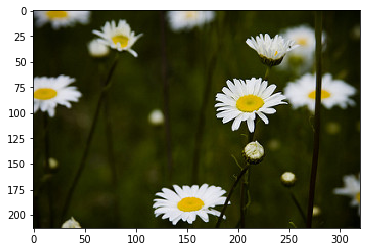

In [12]:
from matplotlib import pyplot as plt
print(f'{path}/flowers/daisy/{img}')
pltImg = plt.imread(f'{path}/flowers/daisy/{img}')
plt.imshow(pltImg)

In [16]:
from torchvision.models import resnet34
from fastai.dataset import ImageClassifierData
from fastai.conv_learner import ConvLearner
from fastai.transforms import tfms_from_model
print('end import')

end import


In [30]:
sz=224
arch=resnet34
data = ImageClassifierData.from_paths(f'{path}/flowers-formated', tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
print('learned')


100%|██████████| 11/11 [00:18<00:00,  1.71s/it]
learned


In [31]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 74%|███████▎  | 28/38 [00:30<00:10,  1.07s/it, loss=4.62]

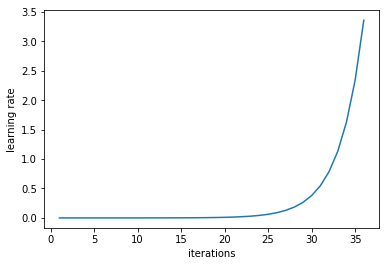

In [32]:
learn.sched.plot_lr()

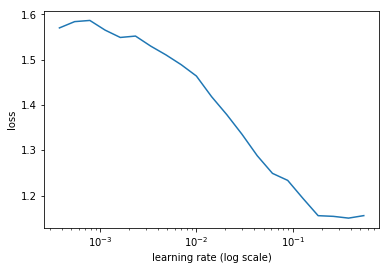

In [33]:
learn.sched.plot()

In [35]:
learn.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.216902   0.288489   0.910326  
    1      0.203983   0.280321   0.914587                  
    2      0.183063   0.273841   0.918849                  



[0.27384144, 0.9188488125801086]

## With data augmentation

In [36]:
data.classes

['daisy', 'dandelion', 'rose', 'sunflower']

In [38]:
from fastai.transforms import tfms_from_model, transforms_side_on
sz=224
arch=resnet34
aug_tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(f'{path}/flowers-formated', tfms=aug_tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
print('learned')

learned


In [39]:
learn.fit(1e-1, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.690678   0.351473   0.907176  
    1      0.443634   0.326752   0.907485                  
    2      0.355759   0.355422   0.906065                  



[0.3554223, 0.9060647216710177]

In [41]:
aug_tfms = tfms_from_model(arch, 299, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(f'{path}/flowers-formated', tfms=aug_tfms)
learn.set_data(data)
learn.fit(1e-1,3,cycle_len=1)
learn.fit(1e-1,3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.247967   0.277587   0.919158  
    1      0.232192   0.286161   0.91996                   
    2      0.180117   0.281967   0.919158                  



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.149229   0.295703   0.915205  
    1      0.163391   0.342151   0.900692                  
    2      0.12753    0.306258   0.919652                  
    3      0.136472   0.344722   0.919158                  
    4      0.122933   0.29807    0.925642                  
    5      0.112813   0.321507   0.917737                  
    6      0.093978   0.309855   0.92311                    



[0.3098555, 0.9231101762164723]

In [43]:
learn.unfreeze()
print("unfreezed")

unfreezed


In [44]:

lr=np.array([1e-4,1e-3,1e-1])

In [45]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.330912   0.246693   0.927063  
    1      0.250515   0.174013   0.943799                  
    2      0.16658    0.173204   0.942688                  
    3      0.153158   0.151262   0.950902                  
    4      0.112186   0.167129   0.946949                  
    5      0.087379   0.168116   0.94664                    
    6      0.064017   0.171454   0.949481                   



[0.171454, 0.9494812271811746]

In [46]:
learn.save('299_all')

In [47]:
lrf=learn.lr_find()


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 68%|██████▊   | 26/38 [01:05<00:30,  2.53s/it, loss=0.227] 

test


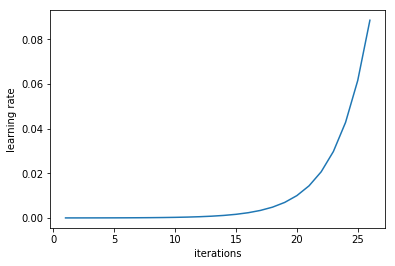

In [51]:
print("test")
learn.sched.plot_lr()

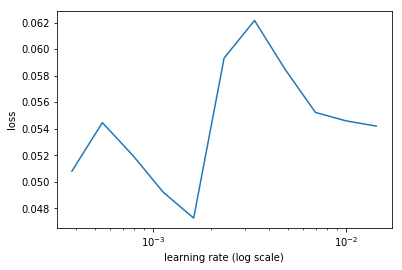

In [52]:

learn.sched.plot()